In [1]:
import pandas as pd
import numpy as np
import common
from wordcloud import WordCloud, STOPWORDS
from tqdm.auto import tqdm
import json
import gc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# To get tip json

line_count = len(open("../data/tip.json").readlines())
business_id, user_id, text, date, compliment_count = [], [], [], [], []

with open("../data/tip.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_id += [blob["business_id"]]
        user_id += [blob["user_id"]]
        text += [blob["text"]]
        date += [blob["date"]]
        compliment_count += [blob["compliment_count"]]

gc.collect()
tip = pd.DataFrame(
 {
    "business_id":business_id, "user_id":user_id, "text":text,
     "date":date, "compliment_count":compliment_count
 }
)#wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
#               stopwords=stopwords, contour_width=3, contour_color='steelblue')

In [3]:
# Loading user json
line_count = len(open("../data/review.json").readlines())
user_ids, business_ids, stars, dates = [], [], [], []
text = []
with open("../data/review.json") as f:
    for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        #user_ids += [blob["user_id"]]
        #business_ids += [blob["business_id"]]
        #stars += [blob["stars"]]
        #dates += [blob["date"]]
        text += [blob["text"]]
#print(text[:10])
gc.collect()
#ratings = pd.DataFrame(
# {
     #"user_id": user_ids, "business_id": business_ids, "rating": stars, "date": dates, 
#     "text":text}
#)

23

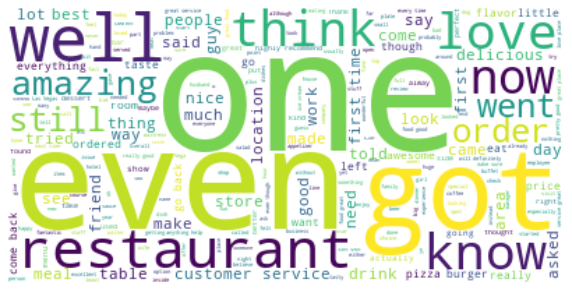

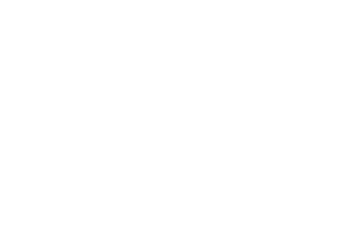

In [4]:
txt = ". ".join(text[:100000])
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_words=2000, mask=None,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(txt)

# show
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


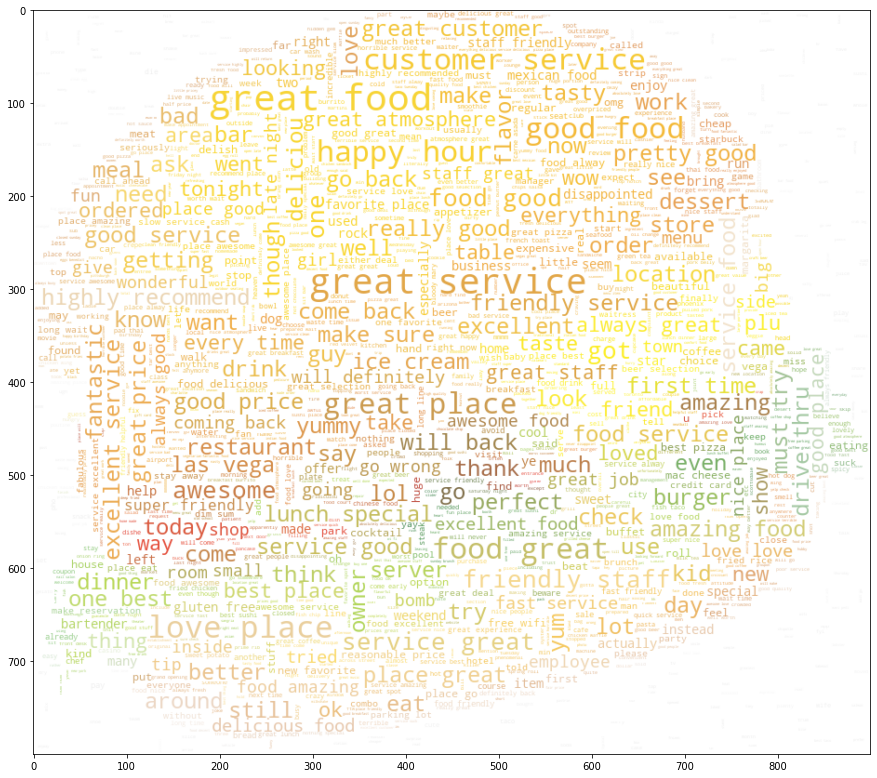

In [5]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

txt = ". ".join(tip.text)
txt = txt.lower()
pic = np.array(Image.open("burger.jpg"))

wc = WordCloud(background_color="white", max_words=2000, mask=pic,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(txt)

# create coloring from image
image_colors = ImageColorGenerator(pic)


# show
plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.show()

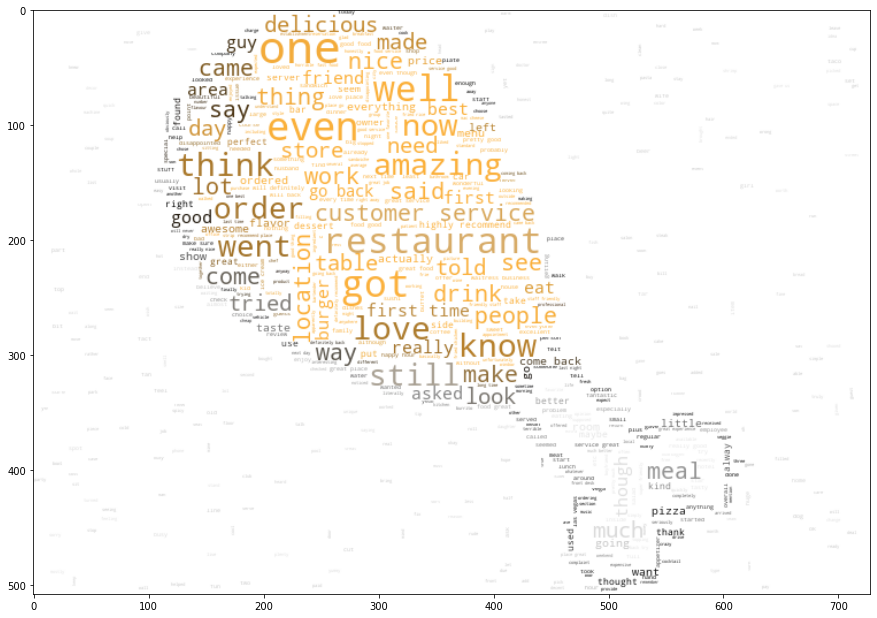

In [6]:
txt = ". ".join(text[:100000])
txt = txt.lower()
pic = np.array(Image.open("chicken_leg.jpg"))

wc = WordCloud(background_color="white", max_words=2000, mask=pic,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(txt)

# create coloring from image
image_colors = ImageColorGenerator(pic)


# show
plt.figure(figsize=(15,15))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.show()